# Example 04-08

Example 03-32


$$\max Z = 2x_1 + x_2$$

\begin{align*}
x_1 + 2x_2  \leq 10\\
x_1 + x_2 \leq 6\\
x_1 - x_2 \leq 2\\
x_1 - 2x_2 \leq 1\\[4mm]
x_1,x_2 \geq 0
\end{align*}


In [1]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [2]:
%run "analytical_method.ipynb"
%run "simplex_algorithm.ipynb"

In [3]:
x = np.linspace(0, 100, 100)

eq1 = (10 - x) / 2  # <=
eq2 = 6 - x         # <=
eq3 = x - 2          # >=
eq4 = (x - 1) / 2  # >=

zeq = lambda v,c: (c - 2*v)

equations_list = [
    (x, eq1),
    (x, eq2),
    (x, eq3),
    (x, eq4),
    ]

equations_label = [
    r"$x_1 + 2x_2 = 10$",
    r"$x_1 + x_2 = 6$",
    r"$x_1 - x_2 = 2$",
    r"$x_1 - 2x_2 = 1$",
    ]

### Primal Problem

In [4]:
cj = np.array([2, 1, 0, 0, 0, 0], dtype=float)

A = np.array([
    [1,  2, 1, 0, 0, 0],
    [1,  1, 0, 1, 0, 0],
    [1, -1, 0, 0, 1, 0],
    [1, -2, 0, 0, 0, 1],
    ], dtype=float)

b = np.array([10, 6, 2, 1], dtype=float)

In [5]:
feasibles, infeasibles, best_vector = analytical(matrix=A, rhs=b, objcoef=cj)

feasibles_points = sorted(feasibles[:, :2], key=lambda t:t[1], reverse=True)

coordinates = [*zip(*feasibles_points)]

In [6]:
solsimplex, zvalues, lastrows_simplex = simplex(matrix=A, rhs=b, z=cj, numxvars=2)

print("Values of Z:\n", zvalues)

Iteration 1
[[ 0.  4.  1.  0.  0. -1.]
 [ 0.  3.  0.  1.  0. -1.]
 [ 0.  1.  0.  0.  1. -1.]
 [ 1. -2.  0.  0.  0.  1.]] 

Solution [1. 0. 9. 5. 1. 0.] 	Z: 2.00 

Iteration 2
[[ 0.  0.  1.  0. -4.  3.]
 [ 0.  0.  0.  1. -3.  2.]
 [ 0.  1.  0.  0.  1. -1.]
 [ 1.  0.  0.  0.  2. -1.]] 

Solution [3. 1. 5. 2. 0. 0.] 	Z: 7.00 

Iteration 3
[[ 0.   0.   1.  -1.5  0.5  0. ]
 [ 0.   0.   0.   0.5 -1.5  1. ]
 [ 0.   1.   0.   0.5 -0.5  0. ]
 [ 1.   0.   0.   0.5  0.5  0. ]] 

Solution [4. 2. 2. 0. 0. 1.] 	Z: 10.00 

Optimal solution found in 3 iterations
Values of Z:
 [2.0, 7.0, 10.0]


### DUAL PROBLEM

$$\min W = 10y_1 + 6y_2 + 2y_3 + y_4$$

\begin{align*}
y_1 + y_2 + y_3 + y_4 \geq 2\\
2y_1 + y_2 - y_3 - 2y_4\geq 1\\[4mm]
y_1,y_2,y_3, y_4\geq 0
\end{align*}

In [8]:
# dual Min
c2j = np.array([10, 6, 2, 1, 0, 0, 1000, 1000], dtype=float)

A2 = np.array([
    [1, 1,  1,  1, -1,  0, 1, 0],
    [2, 1, -1, -2,  0, -1, 0, 1],
    ], dtype=float)

b2 = np.array([2, 1], dtype=float)

In [9]:
print("Dual Problem\n")

soldual, wvalues, lastrows_dual = simplex(matrix=A2, rhs=b2, z=c2j, numxvars=4, direction=-1)

print("Values of W:\n", wvalues)

Dual Problem

Iteration 1
[[ 0.   0.5  1.5  2.  -1.   0.5  1.  -0.5]
 [ 1.   0.5 -0.5 -1.   0.  -0.5  0.   0.5]] 

Solution [0.5 0.  0.  0.  0.  0.  1.5 0. ] 	Z: 1505.00 

Iteration 2
[[ 0.    0.25  0.75  1.   -0.5   0.25  0.5  -0.25]
 [ 1.    0.75  0.25  0.   -0.5  -0.25  0.5   0.25]] 

Solution [1.25 0.   0.   0.75 0.   0.   0.   0.  ] 	Z: 13.25 

Iteration 3
[[-0.333  0.     0.667  1.    -0.333  0.333  0.333 -0.333]
 [ 1.333  1.     0.333  0.    -0.667 -0.333  0.667  0.333]] 

Solution [0.    1.667 0.    0.333 0.    0.    0.    0.   ] 	Z: 10.33 

Iteration 4
[[-0.5  0.   1.   1.5 -0.5  0.5  0.5 -0.5]
 [ 1.5  1.   0.  -0.5 -0.5 -0.5  0.5  0.5]] 

Solution [0.  1.5 0.5 0.  0.  0.  0.  0. ] 	Z: 10.00 

Optimal solution found in 4 iterations
Values of W:
 [1505.0, 13.25, 10.333333333333334, 10.0]


### Plot

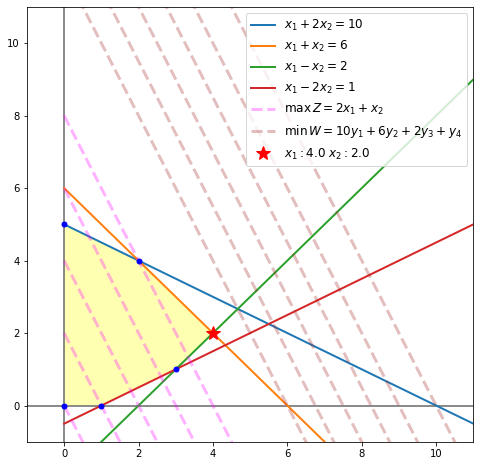

In [10]:
plt.figure(figsize=(8,8))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)

# Z values
plt.plot(x, zeq(x, 0), lw=3, ls="--", color="magenta", alpha=0.3, label=r"$ \max\, Z = 2x_1 + x_2$")
for z in np.linspace(2, 8, 4):
    plt.plot(x, zeq(x, z), lw=3, ls="--", color="magenta", alpha=0.3)

# W values
plt.plot(x, zeq(x, 20), lw=3, ls="--", color="brown", alpha=0.3, label=r"$ \min\, W = 10y_1 + 6y_2 + 2y_3 + y_4$")
for w in np.linspace(18, 12, 5):
    plt.plot(x, zeq(x, w), lw=3, ls="--", color="brown", alpha=0.3)

for point in feasibles_points:
    plt.plot(*point, color="blue", marker="o", ms=5)

plt.plot(*solsimplex[-1, :2], 
         color="red", 
         marker="*", 
         ms=15, ls="", 
         label=rf'$x_1:{solsimplex[-1, :2][0]} \,\, x_2:{solsimplex[-1, :2][1]}$')

plt.fill(*coordinates, facecolor="yellow", alpha=0.3)


plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.legend(fontsize=12, loc="upper right")
plt.show()

### Solutions for Primal and Dual Problems

In [11]:
print("Primal Solution\n", solsimplex[-1])
print("Dual Solution\n", soldual[-1, :-2])

Primal Solution
 [4. 2. 2. 0. 0. 1.]
Dual Solution
 [0.  1.5 0.5 0.  0.  0. ]


#### Comparing constraints with primal solution

In [12]:
print()
print("Primal solution: ", solsimplex[-1])
print("Evaluating constraints: \n", A[:, :2].dot(solsimplex[-1, :2]))
print("Right-hand side: ", b)


Primal solution:  [4. 2. 2. 0. 0. 1.]
Evaluating constraints: 
 [8. 6. 2. 0.]
Right-hand side:  [10.  6.  2.  1.]


#### Comparing constraints with dual solution

In [13]:
print()
print("Dual solution: ", soldual[-1])
print("Evaluating constraints: \n",A2[:, :4].dot(soldual[-1, :4] ))
print("Right-hand side: ", b2)


Dual solution:  [0.  1.5 0.5 0.  0.  0.  0.  0. ]
Evaluating constraints: 
 [2. 1.]
Right-hand side:  [2. 1.]


In [14]:
print(lastrows_simplex)

[[ 2.   1.   0.   1.5  0.5  0. ]
 [ 0.   0.   0.  -1.5 -0.5  0. ]
 [ 4.   2.   2.   0.   0.   1. ]]


In [15]:
print(lastrows_dual)

[[   8.     6.     2.     0.    -4.    -2.     4.     2. ]
 [  -2.    -0.    -0.    -1.    -4.    -2.  -996.  -998. ]
 [   0.     1.5    0.5    0.     0.     0.     0.     0. ]]
